# Chronic Kidney Disease Prediction

## Step 1 : Importing all the libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Step 2 : Loading the dataset


#### we can also download the data set from : https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

=============================================

   :Attribute Information:

    We use 24 + class = 25 ( 11 numeric ,14 nominal)
    1. Age(numerical)
    age in years
    2. Blood Pressure(numerical)
    bp in mm/Hg
    3.Specific Gravity(nominal)
    sg - (1.005,1.010,1.015,1.020,1.025)
    4.Albumin(nominal)
    al - (0,1,2,3,4,5)
    5.Sugar(nominal)
    su - (0,1,2,3,4,5)
    6.Red Blood Cells(nominal)
    rbc - (normal,abnormal)
    7.Pus Cell (nominal)
    pc - (normal,abnormal)
    8.Pus Cell clumps(nominal)
    pcc - (present,notpresent)
    9.Bacteria(nominal)
    ba - (present,notpresent)
    10.Blood Glucose Random(numerical)
    bgr in mgs/dl
    11.Blood Urea(numerical)
    bu in mgs/dl
    12.Serum Creatinine(numerical)
    sc in mgs/dl
    13.Sodium(numerical)
    sod in mEq/L
    14.Potassium(numerical)
    pot in mEq/L
    15.Hemoglobin(numerical)
    hemo in gms
    16.Packed Cell Volume(numerical)
    17.White Blood Cell Count(numerical)
    wc in cells/cumm
    18.Red Blood Cell Count(numerical)
    rc in millions/cmm
    19.Hypertension(nominal)
    htn - (yes,no)
    20.Diabetes Mellitus(nominal)
    dm - (yes,no)
    21.Coronary Artery Disease(nominal)
    cad - (yes,no)
    22.Appetite(nominal)
    appet - (good,poor)
    23.Pedal Edema(nominal)
    pe - (yes,no)
    24.Anemia(nominal)
    ane - (yes,no)
    25.Class (nominal)
    class - (ckd,notckd)



In [2]:
#importing the dataset
df=pd.read_csv('kidney_disease.csv')

df.head(7)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd


## Step 3- Preprocessing


#### Exploratory Data Analysis

In [3]:
df.shape

(400, 26)

In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

In [6]:
basic_EDA(df)

Number of Samples: 400,
Number of Features: 26,
Duplicated Entries: 0,
Null Entries: 1009,
Number of Rows with Null Entries: 242 60.5%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

- count tells us the number of NoN-empty rows in a feature.
- mean tells us the mean value of that feature.
- std tells us the Standard Deviation Value of that feature.
- min tells us the minimum value of that feature.
- 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
- max tells us the maximum value of that feature.

In [9]:
# Renaming the column names
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}
df.rename(columns=col_dict, inplace=True)

In [10]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df=df.drop(['id'],axis=1)
df.shape

(400, 25)

In [12]:
df.head(7)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36,NaN,NaN,no,no,no,good,no,no,ckd


In [13]:
# printing the nan values or missing values from the dataframe
print(df.isnull().sum())

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64


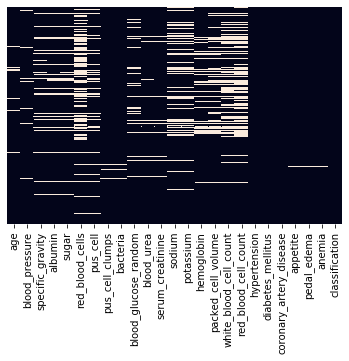

In [14]:
# check for nan values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [15]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [16]:
# dividing & storing numerical and alphabetical datas

numerical = []
categorical = [] #alphabetical data
for i in df.columns:
  if (df[i].dtypes)=='O':   #object
    categorical.append(i)
  else:
    numerical.append(i)
    
print(numerical)
print("-----------------------------------------")
print(categorical)

['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin']
-----------------------------------------
['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']


In [17]:
for i in df.columns:
  print(i,df[i].unique())
  print("")


age [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]

blood_pressure [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]

specific_gravity [1.02  1.01  1.005 1.015   nan 1.025]

albumin [ 1.  4.  2.  3.  0. nan  5.]

sugar [ 0.  3.  4.  1. nan  2.  5.]

red_blood_cells [nan 'normal' 'abnormal']

pus_cell ['normal' 'abnormal' nan]

pus_cell_clumps ['notpresent' 'present' nan]

bacteria ['notpresent' 'present' nan]

blood_glucose_random [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 1

In [18]:
#df.replace('\t?',np.nan,inplace=True)
# replacing \t values 
df.replace(to_replace={'\t43':'43','\t6200':'6200','\t8400':'8400','\t?':np.nan,'ckd\t':1,'ckd':1,'notckd':0},inplace=True)
print(df)

      age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0             NaN   
1     7.0            50.0             1.020      4.0    0.0             NaN   
2    62.0            80.0             1.010      2.0    3.0          normal   
3    48.0            70.0             1.005      4.0    0.0          normal   
4    51.0            80.0             1.010      2.0    0.0          normal   
5    60.0            90.0             1.015      3.0    0.0             NaN   
6    68.0            70.0             1.010      0.0    0.0             NaN   
7    24.0             NaN             1.015      2.0    4.0          normal   
8    52.0           100.0             1.015      3.0    0.0          normal   
9    53.0            90.0             1.020      2.0    0.0        abnormal   
10   50.0            60.0             1.010      2.0    4.0             NaN   
11   63.0            70.0             1.010      3.0

In [19]:
map_values = {'normal':0,'abnormal':1,'notpresent':0,'present':1,'yes':1,'no':0,'\tno':0,'\tyes':1,' yes':1,'good':1,'poor':0}
df.replace(to_replace=map_values,inplace=True)
print(df)

      age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0              NaN   
1     7.0            50.0             1.020      4.0    0.0              NaN   
2    62.0            80.0             1.010      2.0    3.0              0.0   
3    48.0            70.0             1.005      4.0    0.0              0.0   
4    51.0            80.0             1.010      2.0    0.0              0.0   
5    60.0            90.0             1.015      3.0    0.0              NaN   
6    68.0            70.0             1.010      0.0    0.0              NaN   
7    24.0             NaN             1.015      2.0    4.0              0.0   
8    52.0           100.0             1.015      3.0    0.0              0.0   
9    53.0            90.0             1.020      2.0    0.0              1.0   
10   50.0            60.0             1.010      2.0    4.0              NaN   
11   63.0            70.0             1.

In [20]:
#Taking care of missing values  using imputer class

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):
    
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
df = pd.DataFrame(df)
df = DataFrameImputer().fit_transform(df)
df.head()





,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,0.189516,0.0,0.0,0.0,121.000000,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.189516,0.0,0.0,0.0,148.036517,...,38,6000,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.000000,0.0,0.0,0.0,423.000000,...,31,7500,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.000000,1.0,1.0,0.0,117.000000,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.000000,0.0,0.0,0.0,106.000000,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [21]:
# chechking nan values 
print(df.isnull().sum())

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64


In [22]:
# making all the types to float
# df.astype(float)

In [23]:
# displaying te corelation between each column
df.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,sodium,potassium,hemoglobin,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
age,1.000000,0.148004,-0.180570,0.114764,0.207857,0.062550,0.138527,0.156926,0.042007,0.214410,...,-0.085949,0.050148,-0.175380,0.394698,0.364598,0.233278,-0.159558,0.096146,0.052039,0.225405
blood_pressure,0.148004,1.000000,-0.182463,0.146593,0.200784,0.197767,0.170651,0.057705,0.110874,0.149100,...,-0.103220,0.066648,-0.279535,0.267574,0.225455,0.085333,-0.176101,0.052613,0.193717,0.290600
specific_gravity,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,-0.331715,-0.361897,-0.289162,-0.219679,-0.326339,...,0.242841,-0.061821,0.531755,-0.362065,-0.388565,-0.152670,0.246286,-0.271970,-0.212814,-0.698957
albumin,0.114764,0.146593,-0.466698,1.000000,0.268070,0.381913,0.547333,0.397215,0.366012,0.326400,...,-0.271316,0.114427,-0.549697,0.479359,0.375631,0.235574,-0.329650,0.440051,0.281525,0.599238
sugar,0.207857,0.200784,-0.287993,0.268070,1.000000,0.118297,0.188632,0.150019,0.106649,0.639186,...,-0.073715,0.181015,-0.191518,0.291929,0.471360,0.246089,-0.080117,0.130227,0.065901,0.327812
red_blood_cells,0.062550,0.197767,-0.331715,0.381913,0.118297,1.000000,0.360912,0.091060,0.161983,0.196778,...,-0.181476,-0.032253,-0.371550,0.221493,0.237221,0.137894,-0.204570,0.227309,0.138347,0.447155
pus_cell,0.138527,0.170651,-0.361897,0.547333,0.188632,0.360912,1.000000,0.503018,0.320484,0.275074,...,-0.200417,0.155589,-0.458139,0.340138,0.262396,0.188625,-0.286944,0.371639,0.287904,0.430991
pus_cell_clumps,0.156926,0.057705,-0.289162,0.397215,0.150019,0.091060,0.503018,1.000000,0.274491,0.195715,...,-0.140630,-0.006630,-0.273496,0.192055,0.161792,0.186599,-0.187662,0.102351,0.174185,0.261001
bacteria,0.042007,0.110874,-0.219679,0.366012,0.106649,0.161983,0.320484,0.274491,1.000000,0.084561,...,-0.080638,-0.002907,-0.203303,0.086407,0.077551,0.161364,-0.147670,0.133334,0.050954,0.183779
blood_glucose_random,0.214410,0.149100,-0.326339,0.326400,0.639186,0.196778,0.275074,0.195715,0.084561,1.000000,...,-0.154393,0.056695,-0.269149,0.367563,0.498598,0.211354,-0.175540,0.100913,0.126346,0.401374


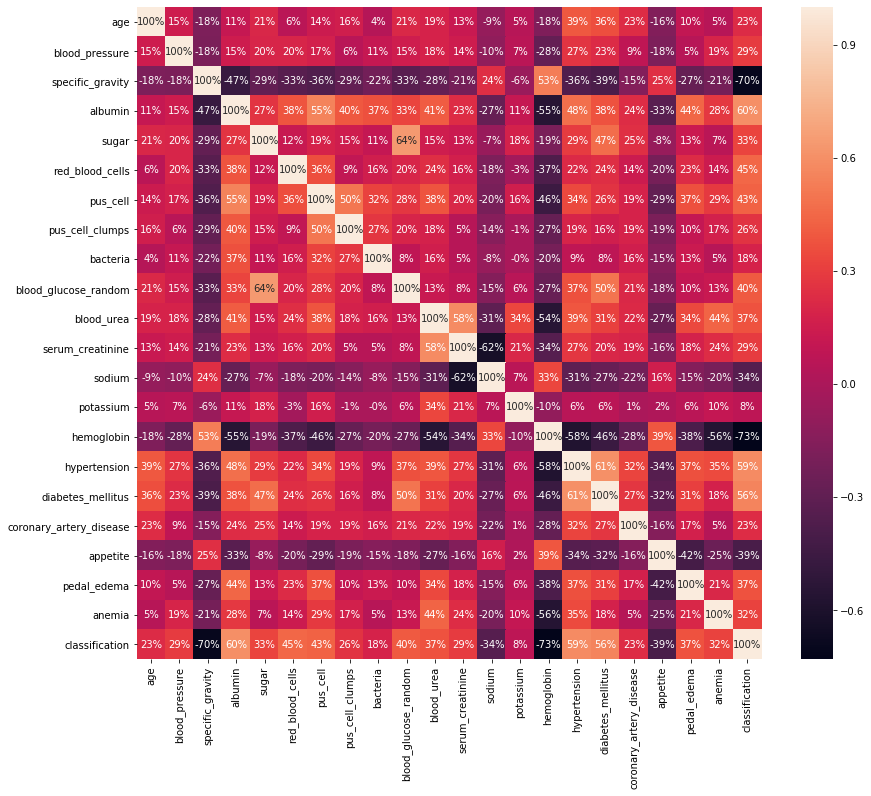

In [24]:
# plotting heatmap of corelation
df_corr = df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(df_corr,annot=True,fmt='.0%')

Positive Correlation:

Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
Sugar -> Blood glucose random
Blood Urea -> Serum creatinine
Hemoglobin -> Red Blood cell count <- packed cell volume


Negative Correlation:

Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
Serum creatinine -> Sodium

In [25]:
# corelation output is very less so dropping one table
df= df.drop(['potassium'],axis=1)
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,0.189516,0.0,0.0,0.0,121.000000,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.189516,0.0,0.0,0.0,148.036517,...,38,6000,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.000000,0.0,0.0,0.0,423.000000,...,31,7500,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.000000,1.0,1.0,0.0,117.000000,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.000000,0.0,0.0,0.0,106.000000,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


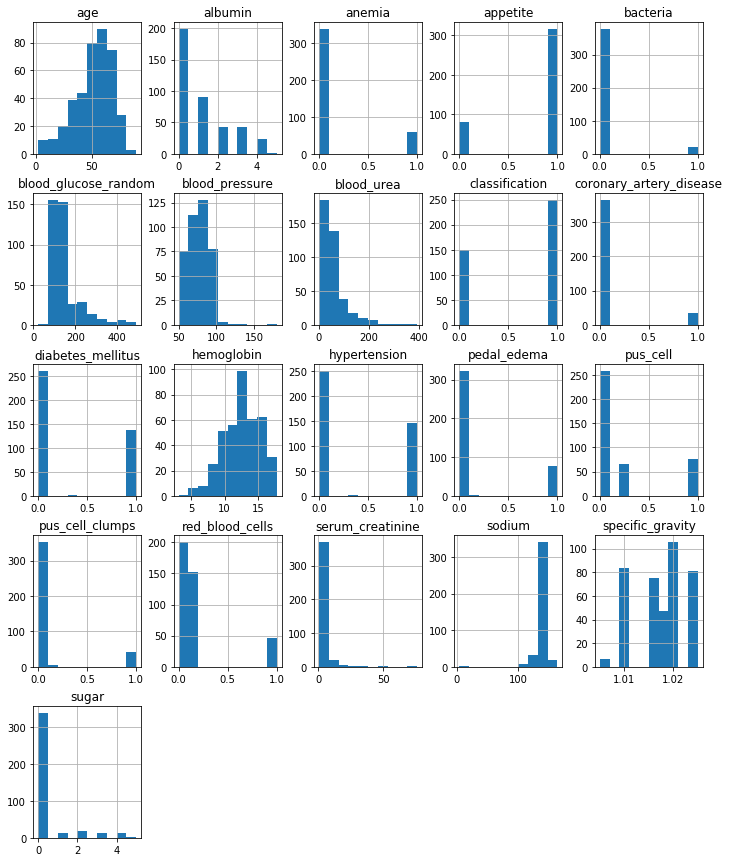

In [26]:
# plotting histogram graph
df.hist(figsize=(12,15))
plt.show()

In [27]:
# get a count of the number of Malignant or Benign cells
    
# malignant :- Harmful / cancereous
# benign :- unharmful/uncancereous

df['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

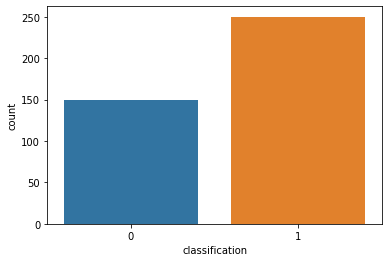

In [28]:
# plotting count plot
sns.countplot(df['classification'])

## Step 4 : Splitting into dependant and independant variables

In [29]:
X=df.drop('classification',axis=1)
Y=df['classification']

X.shape,Y.shape

((400, 23), (400,))

## Step 5 : Splitting the datasets into 75% traning and 25% testing


In [30]:
#split the dataset into train and test 
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=5)



In [31]:
print('The size of x_train :',X_train.shape)
print('The size of x_test :',X_test.shape)
print('The size of y_train :',Y_train.shape)
print('The size of y_test :',Y_test.shape)

The size of x_train : (300, 23)
The size of x_test : (100, 23)
The size of y_train : (300,)
The size of y_test : (100,)


## Step 6 : Feature Scaling


In [32]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Scale the data to bring all features to the same level of magnitude, 
# which means the feature / independent data will be within a specific range for example 0–100 or 0–1.

In [33]:
print(X_train)

print('---------------')
print(X_test)

[[-0.59649784  1.8195892  -0.42028731 ... -1.88216775 -0.4913651
  -0.42161225]
 [ 0.47207495  1.8195892   0.50502456 ... -1.88216775 -0.4913651
  -0.42161225]
 [-0.59649784 -0.54070466  1.43033642 ...  0.53298897 -0.4913651
  -0.42161225]
 ...
 [ 0.70953558 -1.32746928 -1.34559917 ... -1.88216775  2.04185921
  -0.42161225]
 [ 0.47207495 -0.54070466 -1.34559917 ...  0.53298897 -0.4913651
  -0.42161225]
 [-1.7244358  -1.32746928  0.50502456 ...  0.53298897 -0.4913651
  -0.42161225]]
---------------
[[-1.13078424  1.03282458 -0.42028731 ...  0.53298897 -0.4913651
  -0.42161225]
 [-0.03351575 -0.54070466 -1.34559917 ... -1.88216775 -0.4913651
  -0.42161225]
 [-0.03351575 -0.54070466  0.50502456 ...  0.53298897 -0.4913651
  -0.42161225]
 ...
 [ 0.53144011  0.24605996  0.50502456 ...  0.53298897 -0.4913651
  -0.42161225]
 [ 0.9469962   1.03282458 -1.34559917 ... -1.88216775 -0.4913651
  -0.42161225]
 [ 0.47207495  1.8195892   1.43033642 ...  0.53298897 -0.4913651
  -0.42161225]]


## Step 7 : Model Selection

### Train the model

In [34]:
def models(X_train,Y_train):
    
  
  #Using Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  

  algos=['Logistic Regression','K Nearest Neighbor','SVM(Linear Classifier)',
         'SVM(RBF Classifier)','Naive Bayes','Decision Tree','Random Forest'] 
  
  accuracy = [log.score(X_train, Y_train),knn.score(X_train, Y_train),
              svc_lin.score(X_train, Y_train),svc_rbf.score(X_train, Y_train),
              gauss.score(X_train, Y_train),tree.score(X_train, Y_train),forest.score(X_train, Y_train)]
    
  
  
  for i in range(7):
      print([i],'{} Training Accuracy: {} %'.format(algos[i],round((accuracy[i])*100,2)))
  
  print("")
  print("Plotting accuracy Barplot......")
  color=['green','#0FBBAE','purple','red','orange','magenta','cyan']
  sns.set_style('whitegrid')
  plt.figure(figsize=(15,6)) #size of the graph
  plt.ylabel('Accuracy(%)')
  plt.title("Algorithm prediction")
  plt.xlabel('Algorithms')
  sns.barplot(x=algos,y=accuracy,palette=color)  
  plt.show()
  
    
  # using zip() to convert lists to dictionary
  training_acc = dict(zip(algos, accuracy))
  

  max_key = max(training_acc, key=training_acc.get)
  max_value = max(training_acc.values())

  print('The maximum training accuracy is given by {} model at {} %'.format(max_key,round(max_value,2)*100))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

[0] Logistic Regression Training Accuracy: 100.0 %
[1] K Nearest Neighbor Training Accuracy: 98.0 %
[2] SVM(Linear Classifier) Training Accuracy: 100.0 %
[3] SVM(RBF Classifier) Training Accuracy: 100.0 %
[4] Naive Bayes Training Accuracy: 95.33 %
[5] Decision Tree Training Accuracy: 100.0 %
[6] Random Forest Training Accuracy: 100.0 %

Plotting accuracy Barplot......


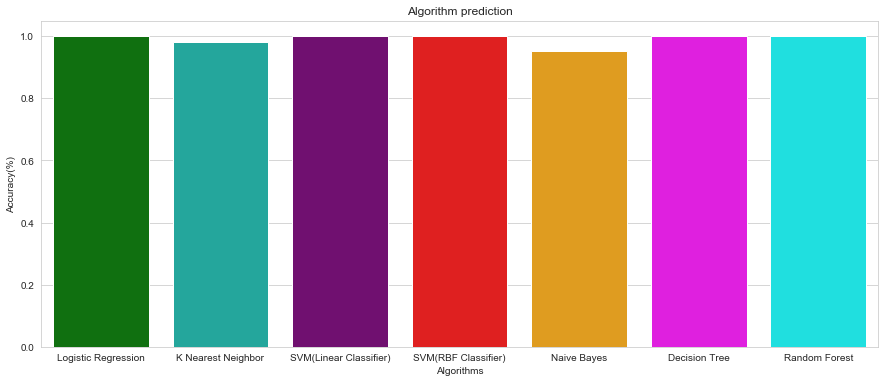

The maximum training accuracy is given by Logistic Regression model at 100.0 %


In [35]:
model = models(X_train,Y_train)

### Test the model

In [36]:
model_name=['Logistic Regression','K Nearest Neighbor','SVM(Linear Classifier)',
         'SVM(RBF Classifier)','Naive Bayes','Decision Tree','Random Forest']

In [37]:
# test model accuracy on test data on confusion matrix

from sklearn.metrics import confusion_matrix
cMatrix=[]
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  cMatrix.append(cm)
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print("")
  print('Model[{}] {} Testing Accuracy = {} %'.format(i, model_name[i], round((TP + TN) / (TP + TN + FN + FP)*100 ,2)))
  
  print('------------')

[[44  0]
 [ 0 56]]

Model[0] Logistic Regression Testing Accuracy = 100.0 %
------------
[[44  0]
 [ 3 53]]

Model[1] K Nearest Neighbor Testing Accuracy = 97.0 %
------------
[[44  0]
 [ 1 55]]

Model[2] SVM(Linear Classifier) Testing Accuracy = 99.0 %
------------
[[44  0]
 [ 2 54]]

Model[3] SVM(RBF Classifier) Testing Accuracy = 98.0 %
------------
[[43  1]
 [ 4 52]]

Model[4] Naive Bayes Testing Accuracy = 95.0 %
------------
[[42  2]
 [ 1 55]]

Model[5] Decision Tree Testing Accuracy = 97.0 %
------------
[[44  0]
 [ 0 56]]

Model[6] Random Forest Testing Accuracy = 100.0 %
------------


In [38]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,roc_auc_score
pred_lis=[]
for i in range(len(model)):
  print(f'Model {[i]} : {model_name[i]}')
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  pred_lis.append(accuracy_score(Y_test, model[i].predict(X_test))*100)
  print( "Accuracy is: {} %".format(pred_lis[i]))
  print( "ROC AUC score is: {} %".format(roc_auc_score(Y_test, model[i].predict(X_test))*100))

  print('---------------------')

Model [0] : Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        56

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Accuracy is: 100.0 %
ROC AUC score is: 100.0 %
---------------------
Model [1] : K Nearest Neighbor
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.95      0.97        56

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

Accuracy is: 97.0 %
ROC AUC score is: 97.32142857142857 %
---------------------
Model [2] : SVM(Linear Classifier)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99 

In [39]:
    
data=list(zip(model_name,pred_lis))
result=pd.DataFrame(data,columns=['Model','Accuracy']).sort_values(["Accuracy"], ascending = False)
result

,Model,Accuracy
0,Logistic Regression,100.0
6,Random Forest,100.0
2,SVM(Linear Classifier),99.0
3,SVM(RBF Classifier),98.0
1,K Nearest Neighbor,97.0
5,Decision Tree,97.0
4,Naive Bayes,95.0


In [40]:
maxAcc = dict(zip(model_name,pred_lis))
max_key = max(maxAcc, key=maxAcc.get)
max_value = max(maxAcc.values())

print('The maximum  accuracy is given by {} model at {} %'.format(max_key,max_value))
print()
print(f'So we are going to choose {max_key} model for our project')


The maximum  accuracy is given by Logistic Regression model at 100.0 %

So we are going to choose Logistic Regression model for our project


accuracy comparison:-


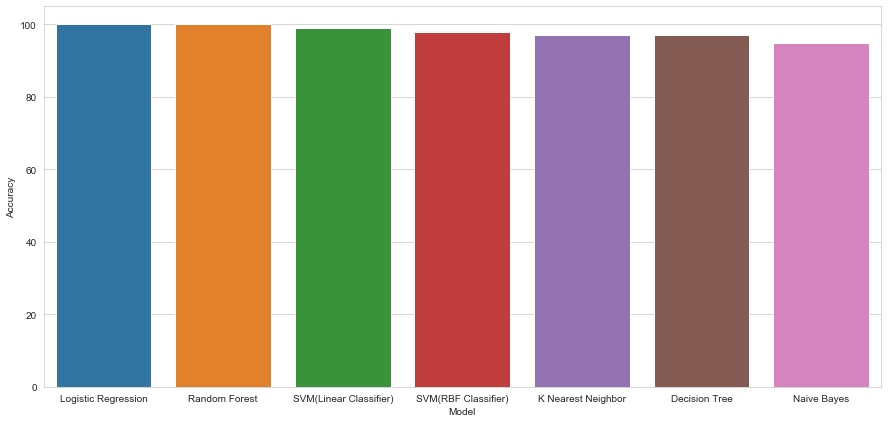

In [41]:
print("accuracy comparison:-")
plt.figure(figsize=(15,7))
sns.barplot(x = "Model", y = "Accuracy", data = result)
plt.show()

In [42]:
ind = list(dict(data).keys()).index(max_key)
ind

0

confusion matrix for Logistic Regression plotted below :-


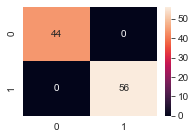

In [43]:
print(f'confusion matrix for {max_key} plotted below :-')

plt.figure(figsize=(3,2))
ax = sns.heatmap(cMatrix[ind], annot=True, fmt="d")
plt.show()

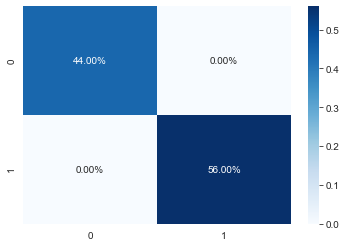

In [44]:
sns.heatmap(cMatrix[ind]/np.sum(cMatrix[ind]), annot=True, 
            fmt='.2%', cmap='Blues')

In [45]:
#Print Prediction of SVM model
pred = model[ind].predict(X_test)

print(pred)
print(pred.shape)

print('---------')

#Print the actual values
print(np.array(Y_test))


[1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1]
(100,)
---------
[1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1]


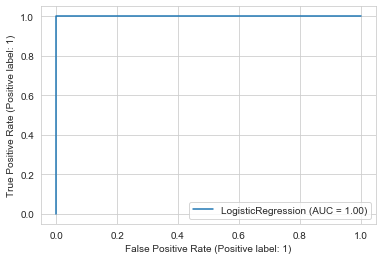

In [46]:
from sklearn import metrics
metrics.plot_roc_curve(model[ind], X_test, Y_test)  
plt.show() 

In [47]:
myFinalmodel = model[ind]
myFinalmodel

LogisticRegression(random_state=0)

## Model export in pickle file for used as backend with django

In [48]:
pd.to_pickle(myFinalmodel,r'C:\Users\msahi\OneDrive\Desktop\Diseae Prediction\models\kidney-logistic.pickle')